### Laboratory of Computational Physics Mod. B 
#### Students

- Marchetti Andrea - 2089216 - andrea.marchetti.5@studenti.unipd.it
- Menti Luca  - 2069534 - luca.menti@studenti.unipd.it
- Merlin Giovanni - 2091186 - giovanni.merlin@studenti.unipd.it
- Saretto Alberto - 2063139 - alberto.saretto.1@studenti.unipd.it


# RESTRICTED BOLTZMANN MACHINE

In [73]:
import numpy as np
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14
from IPython.display import display_html 
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import pandas as pd

Generate a new training set and validation set from a given dataset, each time shuffling the data.

In [74]:
def create_sets(data, train):

    # shuffle the data
    np.random.shuffle(data)

    # calculate the number of samples for the training set
    N = data.shape[0]
    Ntrain = int(N * train)

    training = data[0:Ntrain]
    validation = data[Ntrain:]

    return training, validation

Initialise the RBM's parameters

In [75]:
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
def init_w(L, M):
    
    # range of each initial weight: standard deviation
    sigma = sqrt(4. / float(L + M)) #L= number visible units, M= number of hidden units
    
    w = sigma * np.random.randn(L,M)
    a = sigma * np.random.randn(L) #bias of visible units
    b = np.zeros(M) #bias of hidden units
    
    return w,a,b

## Plotting

Functions to visualise RBM's parameters (biases and weights)

In [76]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j])) #per plottare le linee
    
    # Scatter plot on top of lines
    A=300./(a.max()+b.max())
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i])) #size è proporz al bias 

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")

    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(w, a, b, epoch=0):
    
    L = a.shape[0]
    M = b.shape[0]
    
    (x1,y1)=create_coord(L,0)
    (x2,y2)=create_coord(M,1,f=0.7)

    fig, ax = plt.subplots(1,1 , figsize=(10, 5))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'epoch={epoch}')
    #ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()

Function for the heatmap representing RBM's weights.

In [77]:
from math import ceil

def heatmap(w, n_hid, bn, bl):

    # number of rows
    n = ceil(n_hid/3)

    # Create a figure with a 2x3 grid of subplots
    fig, axes = plt.subplots(nrows=n, ncols=3)

    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    # Define custom colormap
    colors = [(0, 0, 1), (1, 1, 1), (1, 0, 0)]  # blue-white-red
    cmap = LinearSegmentedColormap.from_list('my_cmap', colors, N=256)

    for i in range(n_hid):
        data = w[:,i].reshape(bl,bn)
        sns.heatmap(data, annot=False, ax=axes[i], cmap=cmap, vmin=data.min(), vmax=data.max(), cbar=False)
        axes[i].set_title(f"Hidden unit {i+1}", loc="left", fontstyle='italic', fontsize=20)
        axes[i].tick_params(axis='y', labelrotation=0, labelsize=20)
        axes[i].tick_params(axis='x',labelsize=20)

    # Add a colorbar to the right of the subplots
    cbar_ax = fig.add_axes([2.1, 0.25, 0.05, 0.8]) # adjust position and size of the colorbar axis
    fig.colorbar(axes[0].collections[0], cax=cbar_ax)
    cbar_ax.yaxis.set_ticks_position('right')
    cbar_ax.tick_params(labelleft=False, labelsize=20)

    # Adjust the layout
    fig.subplots_adjust(left=0.5, bottom=0.05, right=2, top=1.2, wspace=0.4, hspace=0.4)

plt.show()

In [78]:
#for better aesthetics of the plots
def better(ax):

    ax.set_xlabel('Epoch', fontsize=30) # set the font size of the x-axis label to 16
    ax.set_ylabel('Log-likelihood', fontsize=30) # set the font size of the y-axis label to 16
    ax.tick_params(axis='x', labelsize=30) # set the size of the x-axis ticks to 16
    ax.tick_params(axis='y', labelsize=30) # set the size of the x-axis ticks to 16
    ax.legend(loc='best', fontsize=30)
    ax.grid(True, linestyle='-', linewidth='0.7', color='gray', alpha=0.5)


#TO DO
#chage default colors, add grid    


In [79]:
#to average the likelihood and calculate the errors
def mean(x,y):

    # Create a dictionary with the arrays as values
    data = {'epoch': x, 'l_train': y}

    # Create a DataFrame from the dictionary
    df = pd.DataFrame(data)

    l=len(x)

    step_size = 10
    x_m = [i*step_size+step_size/2 for i in range(5)]

    y_m = [np.mean(df[df['epoch'].between(step_size*i, step_size*(i+1))]['l_train']) for i in range(5)]

    erry_m = [np.std(df[df['epoch'].between(step_size*i, step_size*(i+1))]['l_train']) for i in range(5)]
    erry_m = erry_m/np.sqrt(10)

    return x_m, y_m, erry_m

In [80]:
## Energy, partition function, likelihood

In [81]:
def energy(v, h, a, b, w):

    return -(np.dot(v,a) + np.dot(h,b) + np.dot(v, np.dot(w,h)))

def partition(w, a, b, bl, bn, SPINS):

    vl = a.shape[0] #20 here
    hl = b.shape[0] #6 here

    binary = np.array([0, 1])

    # create a matrix whose rows make up a list of all the possible combinations of 0,1
    #2**6 rows, 6 cols here
    h = np.indices((2,) * hl).reshape((hl, -1)).T

    # create a matrix whose rows make up a list of all the possible combinations of 0,1,2,3,..., bl
    #4**5 rows, 20 cols here
    v = np.indices((bl,) * bn).reshape((bn, -1)).T

    # now map it to the binary version
    mapping = np.eye(bl)
    mapping = mapping[::-1] # each row is the binary number corresponding to the (decimal) row's index + 1
    v = mapping[v]
    v = v.reshape((v.shape[0],v.shape[1] * v.shape[2]))

    if SPINS:
        # convert 0,1 -> -1,1
        v = 2*v - 1
    
    #calculate partition function:
    #is the summation on all possible values of visible and hidden layer 
    Z=0

    for i in range(v.shape[0]):
        for j in range(h.shape[0]):

            Z += np.exp(-energy(v[i], h[j], a, b, w))

    return Z

In [82]:
def loglike(v_t, N_t, w, a, b, bl, bn, SPINS):

    ampl=1
    E=0

    for k in range(N_t):

        # positive CD phase: generating h 
        h = activate(v_t[k], w,b, SPINS)
        
        #sum energy for every visible (and hidden) layer in dataset
        E += energy(v_t[k],h,a,b,w)

    #mean energy at the end of the epoch
    E /= N_t

    #evaluate the partition function with parameters from the training on the epoch
    Z = partition(w,a,b,bl,bn, SPINS=SPINS)

    #evaluate log likelihood as - <E> - lnZ
    LL = - E - np.log(Z)

    return LL

## Layer generation

Generation of the hidden layer

In [83]:
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in, wei,bias, SPINS, info=False):
    
    if SPINS: 
        vmin = -1
        DE   = 2
    else: 
        vmin = 0
        DE   = 1
    
    act = np.dot(v_in, wei) + bias 
    n = np.shape(act)
    prob = 1. / (1. + exp(-DE*act)) #prob for sigmoid
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's: initialize initial vector (vim= 0 (bits) or -1 (spins))
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

Generation of the visible layer, preserving the one-hot encoding structure

In [84]:
#function fantasy in order to generate fantasy data from hidden variables
def fantasy(h, w, a, b, SPINS):

    Z=0
    bn = 5
    bl = 4

    beta = 1

    v = np.zeros(bn*bl)

    for block in range(bn):
        
        vs = np.diag((1,1,1,1))

        if SPINS: 

            GAP=2
            vs = 2*vs - 1

        E = np.zeros(bl)
        prob = np.zeros(bl)  

        a_red = a[block*bl:(block+1)*bl]       
        w_red = w[block*bl:(block+1)*bl,:]


        for i in range(bl): E[i] = energy(vs[i], h, a_red, b, w_red)
        
        prob = np.exp(-beta * E)

        # normalisation
        Z = np.cumsum(prob)[-1]
        prob = prob/Z

        v[block*bl:(block+1)*bl] = vs[np.random.choice(4, p=prob)]

    #print(prob)
    
    return v

## RBM training

Method: stochastic gradient descent with minibatches

In [85]:
def SGD(v, SPINS, epochs=100, lr=0.1, batch_size=500, plot=True, CDn=1):

    # initialise machine's parameters
    w,a,b=init_w(L, M)

    # plot initial parameters
    if plot == True: plotgraph(w, a, b, 0)   

    N = len(v)

    # random seed for reproducibility
    np.random.seed(12345)

    # learning rate
    l_rate = lr

    # minibatch
    mini, m = batch_size, 0

    # save the likelihood on the training set at each epoch for the plot
    LL_train=np.zeros(epochs)

    # train model
    for epoch in range(epochs):

        # aggregate normalization of batch statistics and learning rate
        l_rate_m = l_rate / mini

        for k in range(N):
            if m==0:
                # initialize averages in miniblock
                v_data, v_model = np.zeros(L),np.zeros(L)
                h_data, h_model = np.zeros(M),np.zeros(M)
                vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

            # positive CD phase: generating h 
            h = activate(v[k], w, b, SPINS)
            hf = h
            for j in range(CDn):
                # negative CD phase: generating fantasy vf
                vf = fantasy(hf, w, a, b, SPINS) 
                # one more positive CD phase: generating fantasy h from fantasy vf 
                hf = activate(vf, w, b, SPINS)

            v_data  += v[k]
            v_model += vf
            h_data  += h
            h_model += hf
            vh_data += np.outer(v[k].T,h)
            vh_model+= np.outer(vf.T,hf)

            #if k==0: print(vf)

            m += 1
            # minibatch
            if m==mini:
                # gradient of the likelihood: follow it along its positive direction
                # with a "vanilla" SGD
                dw = l_rate_m*(vh_data - vh_model) 
                da = l_rate_m*(v_data - v_model)
                db = l_rate_m*(h_data - h_model)

                # basic step of vanilla gradient descent, from eq.(211)
                w = w + dw
                a = a + da
                b = b + db
                m=0
        
        LL_train[epoch] = loglike(v, N, w, a, b, bl, bn, SPINS)

        # randomize the order of input data
        np.random.shuffle(v)
        # decrease the learning rate (here as a power law)
        l_rate = l_rate / (0.01 * l_rate + 1)   

    # calculate final likelihood on the validation set
    likelihood = loglike(v_t, N_t, w, a, b, bl, bn, SPINS)

    # plot final parameters
    if plot == True: plotgraph(w, a, b, epochs)   

    return w, a, b, likelihood, LL_train

Method: Adam

In [86]:
def Adam(v, SPINS, epochs=100, lr=0.1, batch_size=500, plot=True, CDn=1):

    # initialise machine's parameters
    w,a,b=init_w(L, M)

    # plot initial parameters
    if plot == True: plotgraph(w, a, b, 0)   

    N = len(v)

    # random seed for reproducibility
    np.random.seed(12345)

    # learning rate and other parameters
    l_rate = lr
    beta1, beta2, epsilon = 0.9, 0.999, 1e-8
    step = 0
    
    #initialize first and second moments estimates
    m_w, s_w = np.zeros_like(w), np.zeros_like(w)
    m_a, s_a = np.zeros_like(a), np.zeros_like(a)
    m_b, s_b = np.zeros_like(b), np.zeros_like(b)

    # minibatch
    mini, m = batch_size, 0

    # save the likelihood on the training set at each epoch for the plot
    LL_train=np.zeros(epochs)

    # train model
    for epoch in range(epochs):

        # aggregate normalization of batch statistics and learning rate
        l_rate_m = l_rate / mini

        for k in range(N):
            if m==0:
                # initialize averages in miniblock
                v_data, v_model = np.zeros(L),np.zeros(L)
                h_data, h_model = np.zeros(M),np.zeros(M)
                vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))


            # positive CD phase: generating h 
            h = activate(v[k],w,b,SPINS)
            hf = h
            for j in range(CDn):
                # negative CD phase: generating fantasy vf
                vf = fantasy(hf,w,a,b,SPINS) 
                # positive CD phase: generating fantasy h from fantasy vf 
                hf = activate(vf,w,b,SPINS)

            v_data  += v[k]
            v_model += vf
            h_data  += h
            h_model += hf
            vh_data += np.outer(v[k].T,h)
            vh_model+= np.outer(vf.T,hf)

            m += 1
            # minibatch
            if m==mini:
                # gradient of the likelihood: follow it along its positive direction
                grad_w = (vh_data - vh_model) / mini
                grad_a = (v_data - v_model) / mini
                grad_b = (h_data - h_model) / mini

                # Update the first moment estimates
                m_w = beta1 * m_w + (1 - beta1) * grad_w
                m_a = beta1 * m_a + (1 - beta1) * grad_a
                m_b = beta1 * m_b + (1 - beta1) * grad_b

                # Update the second moment estimates
                s_w = beta2 * s_w + (1 - beta2) * grad_w**2
                s_a = beta2 * s_a + (1 - beta2) * grad_a**2
                s_b = beta2 * s_b + (1 - beta2) * grad_b**2

                # Compute the bias-corrected first and second moment estimates
                #changed epoch to steps to account for number of iteration of Adam alg
                
                m_w_hat = m_w / (1 - beta1**(step+1))
                m_a_hat = m_a / (1 - beta1**(step+1))
                m_b_hat = m_b / (1 - beta1**(step+1))
                s_w_hat = s_w / (1 - beta2**(step+1))
                s_a_hat = s_a / (1 - beta2**(step+1))
                s_b_hat = s_b / (1 - beta2**(step+1))

                # Update the weights and biases using Adam update rule
                            
                w = w + l_rate_m * m_w_hat / (np.sqrt(s_w_hat) + epsilon)
                a = a + l_rate_m * m_a_hat / (np.sqrt(s_a_hat) + epsilon)
                b = b + l_rate_m * m_b_hat / (np.sqrt(s_b_hat) + epsilon)

                step += 1

                m=0
        
        LL_train[epoch] = loglike(v, N, w, a, b, bl, bn, SPINS)

        # randomize the order of input data
        np.random.shuffle(v)
        # decrease the learning rate (here as a power law)
        l_rate = l_rate / (0.01 * l_rate + 1)
        
    likelihood = loglike(v_t, N_t, w, a, b, bl, bn, SPINS)

    # plot final parameters
    if plot == True: plotgraph(w, a, b, epochs)    

    return w, a, b, likelihood, LL_train

# Implementation

Load the data

In [87]:
dname="DATA_b"

fname=dname+'/x_RBM_q0.1.dat'

fname_test = dname+'/x_test_RBM_q0.1.dat'

# define the relative dimension of the training and validation set
perc_train = 0.70

# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
data = np.loadtxt(fname, delimiter=" ",dtype=int)
v, v_t = create_sets(data, perc_train)

Information on the dataset

In [88]:
# number of samples and length of a sequence (nr of visible unit)
N = len(v)
N_t = len(v_t)
L = len(v[1])

# RBM, nr of hidden units
M = 6

# number of blocks in a sequence
bn = 5

#length of a block
bl = 4

# NOTE: bn*bl = L

# 1. Spins

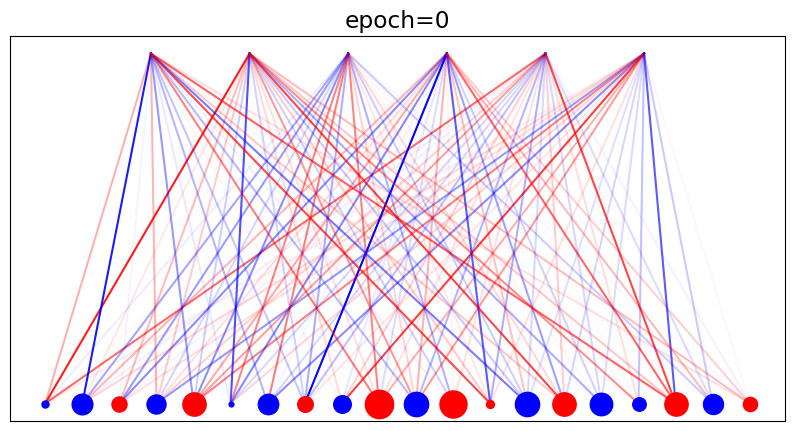

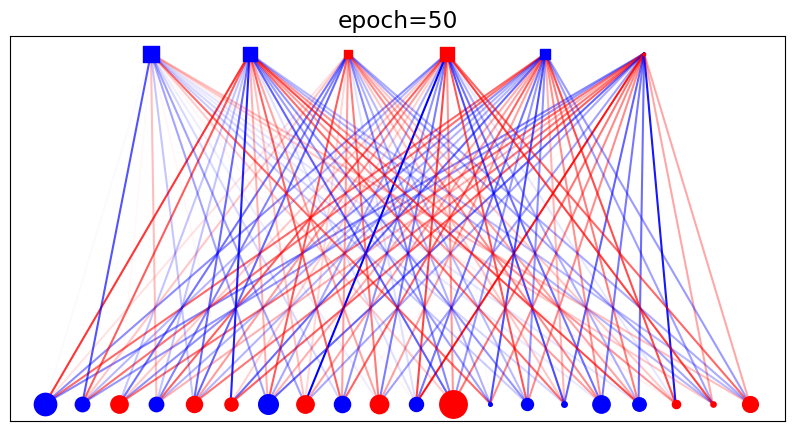

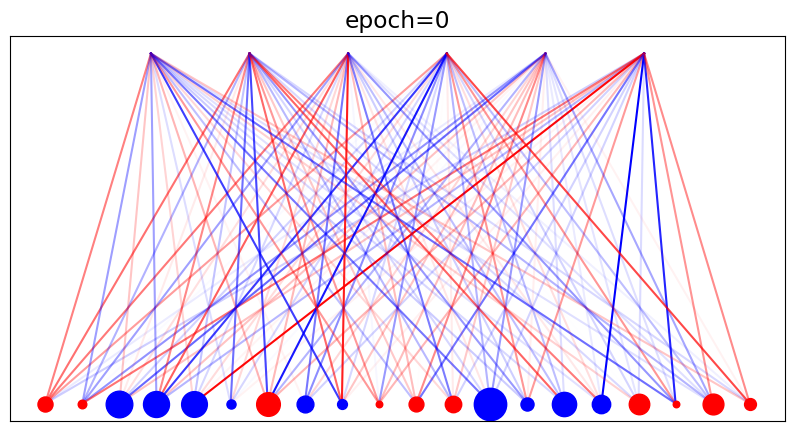

In [89]:
epochs = 50

w1, a1, b1, l_val1, l_train1 = SGD(v, epochs=epochs, SPINS=False)

# Conversion of the values from {0,1} to {-1,1}
v_spin = 2*v - 1

w2, a2, b2, l_val2, l_train2 = SGD(v_spin, epochs=epochs, SPINS=True)

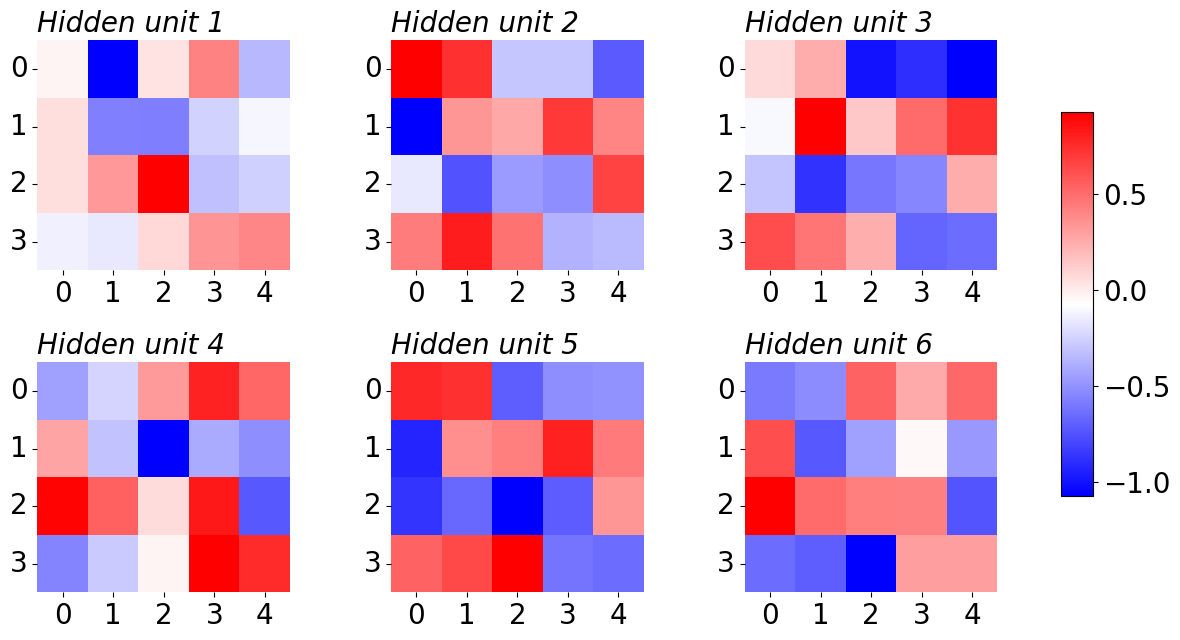

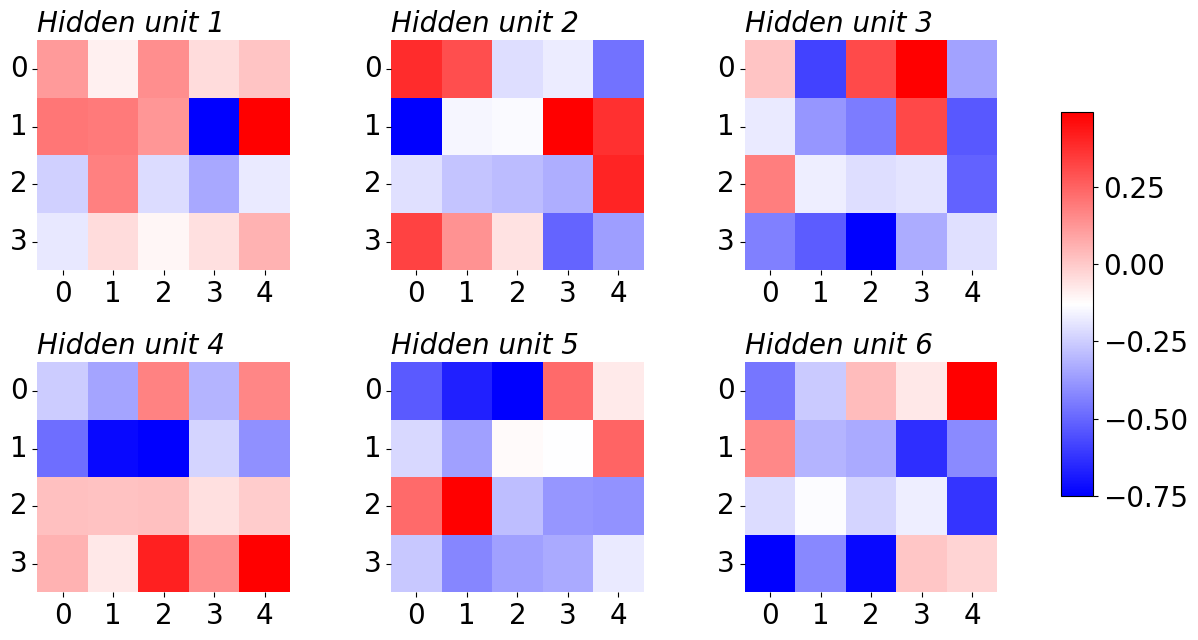

In [90]:
heatmap(w1, M, bn, bl)
heatmap(w2, M, bn, bl)

In [91]:
#combine the plots of the likelihood
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,10))
x = np.arange(epochs)+1


x_m1, l_train_m1, err_m1 = mean(x, l_train1)
x_m2, l_train_m2, err_m2 = mean(x, l_train2)

ax.plot(x, l_train1, color = "b")
ax.errorbar(x_m1 , l_train_m1, label='Spins = {0,1}', yerr=err_m1, fmt='bo', markersize=12)

ax.plot(x, l_train2,  color = "r")
ax.errorbar(x_m2 , l_train_m2, yerr=err_m2, label='Spins = {-1,1}', fmt='rs', markersize=12)

better(ax)


In [92]:
print("Likelihoods: \n")
print("Spins {0,1}: ", l_val1, "\n")
print("Spins {-1,1}: ", l_val2)

Likelihoods: 

Spins {0,1}:  -6.685359597378939 

Spins {-1,1}:  -11.330039022382094


# 2. Adam

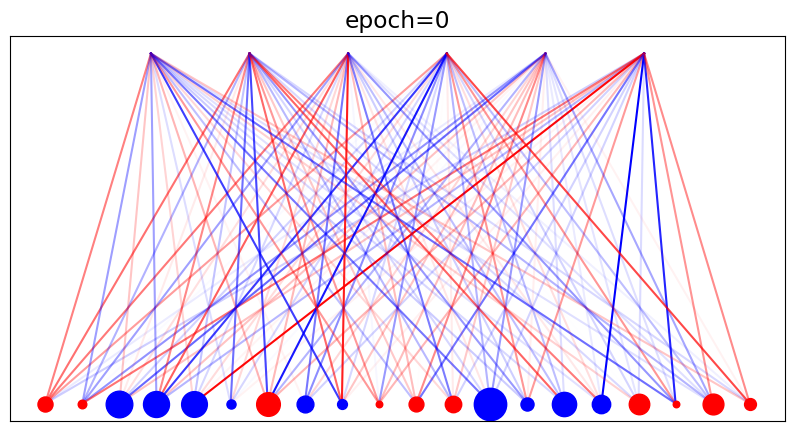

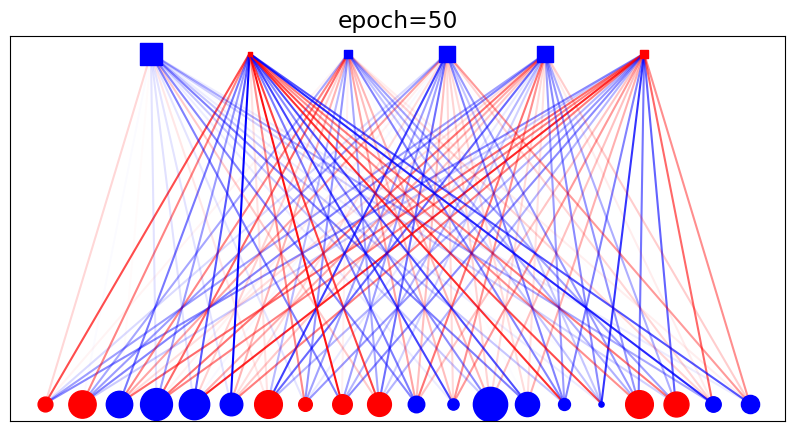

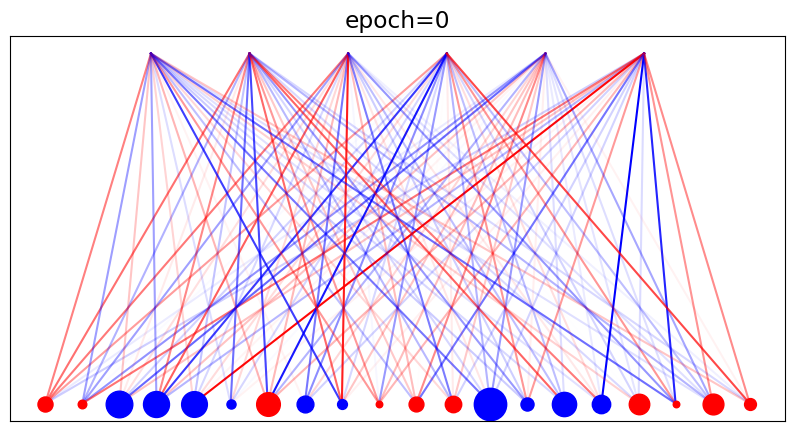

In [93]:
epochs = 50

w3, a3, b3, l_val3, l_train3 = Adam(v, epochs=epochs, lr=10, SPINS=False)

w1_2, a1_2, b1_2, l_val1_2, l_train1_2 = SGD(v, epochs=epochs, lr=10, SPINS=False)

Likelihoods: 

Vanilla SGD:  -5.304416143439057 

Adam:  -6.728884695901024


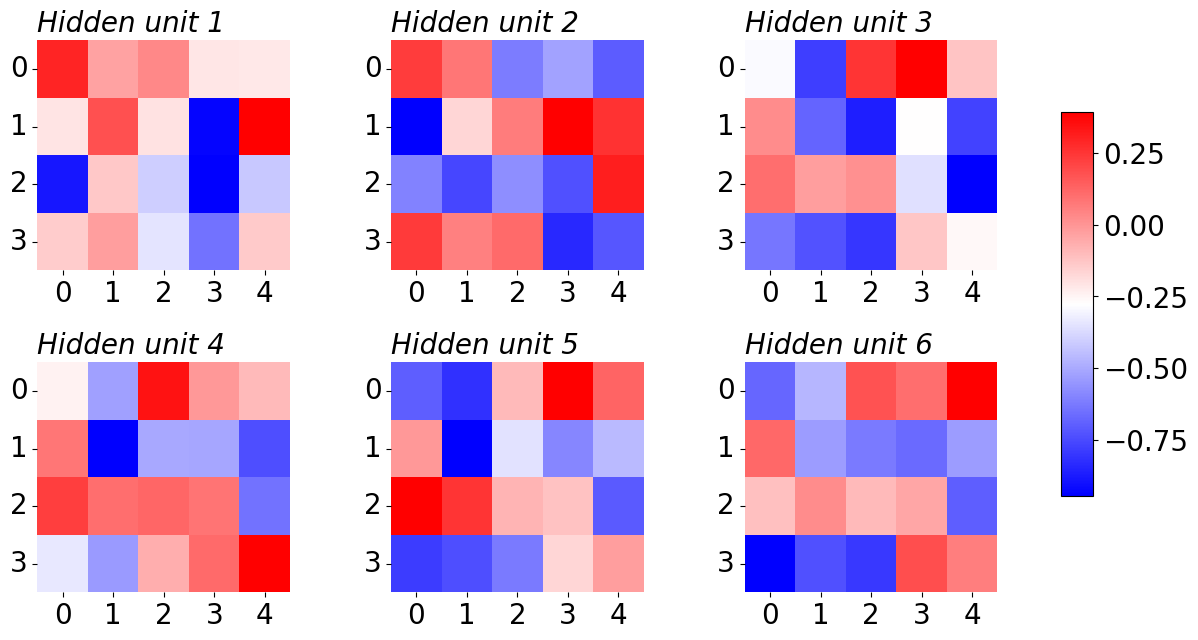

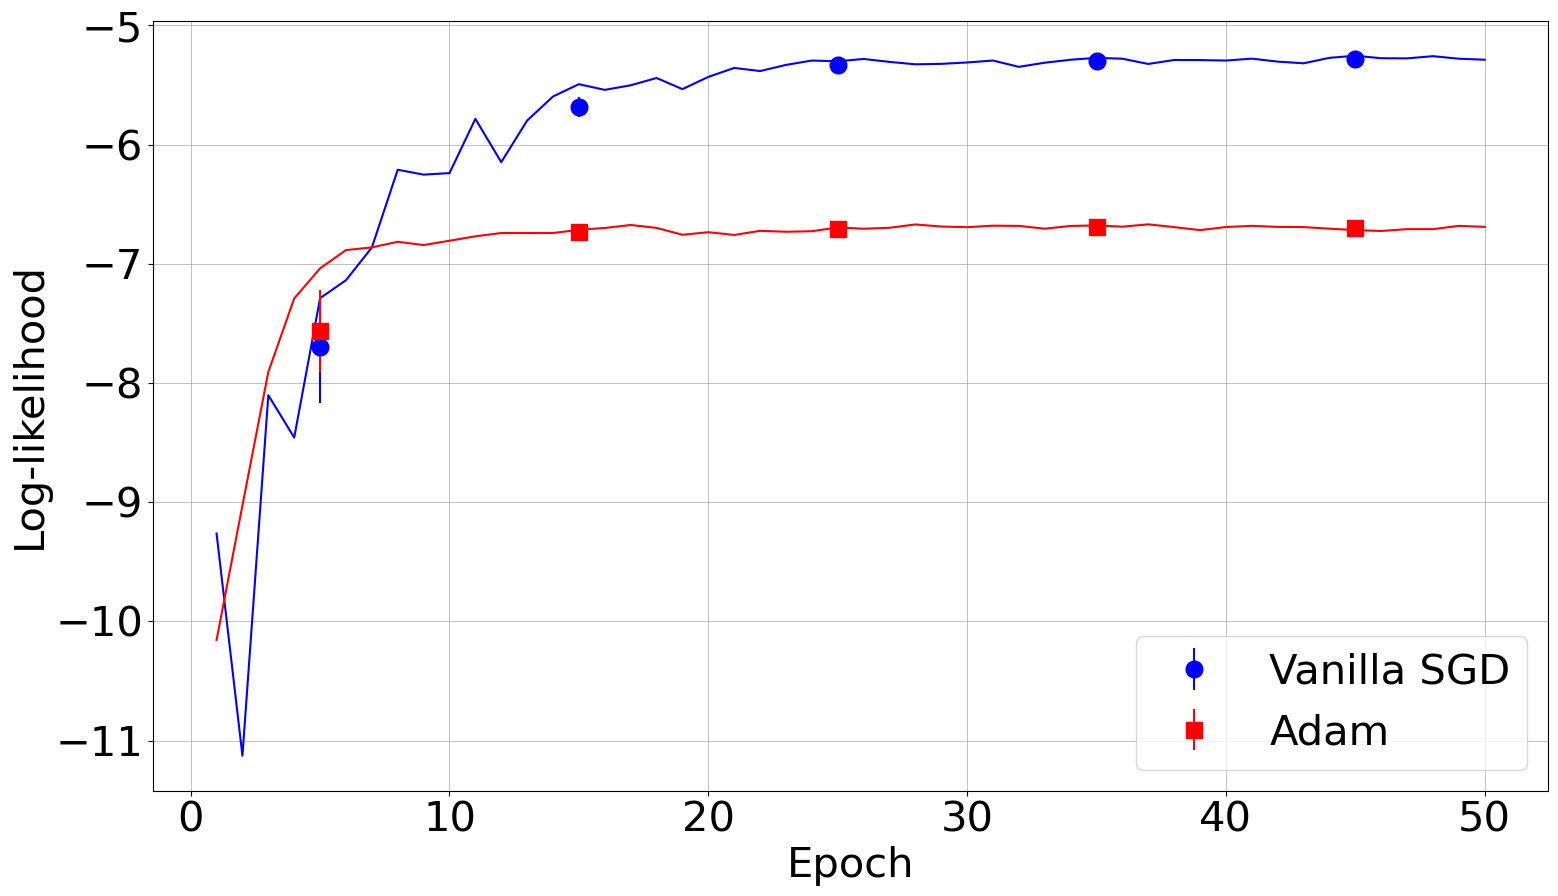

In [94]:
heatmap(w3, M, bn, bl)

#combine the plots of the likelihood
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,10))
x = np.arange(epochs)+1



x_m3, l_train_m3, err_m3 = mean(x, l_train3)
x_m1_2, l_train_m1_2, err_m1_2 = mean(x, l_train1_2)


ax.plot(x, l_train1_2,  color = 'b')
ax.errorbar(x_m1 , l_train_m1_2, yerr=err_m1_2, label='SGD', fmt='bo', markersize=12)

ax.plot(x, l_train3,  color = 'r')
ax.errorbar(x_m3 , l_train_m3, yerr=err_m3, label='Adam' , fmt='rs', markersize=12)

better(ax)

print("Likelihoods: \n")
print("SGD: ", l_val1_2, "\n")
print("Adam: ", l_val3)

# 3. Contrastive steps

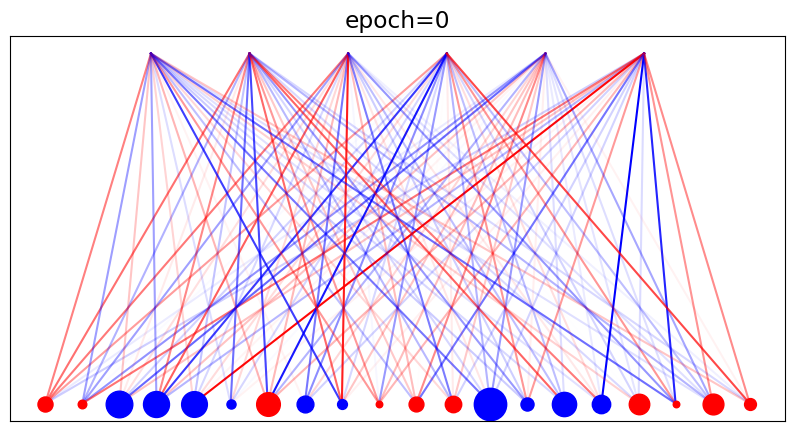

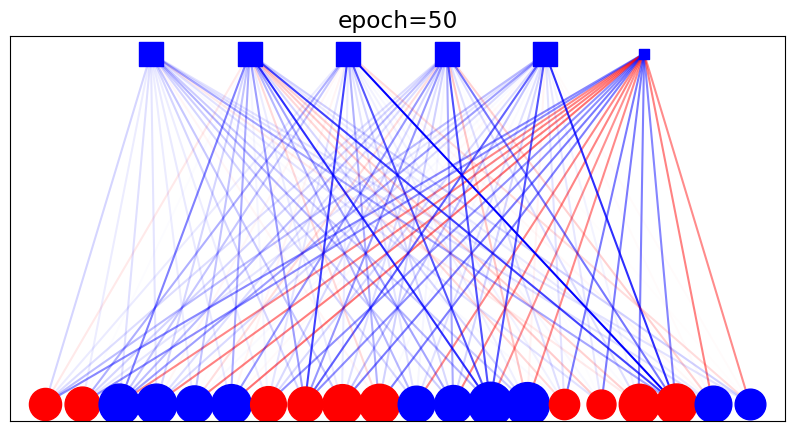

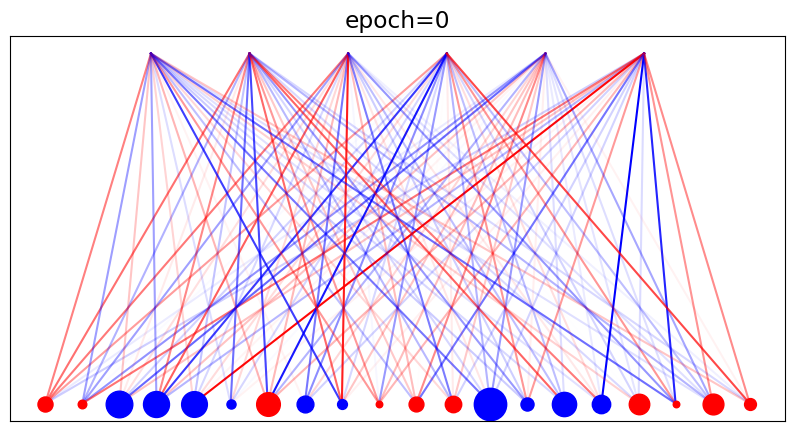

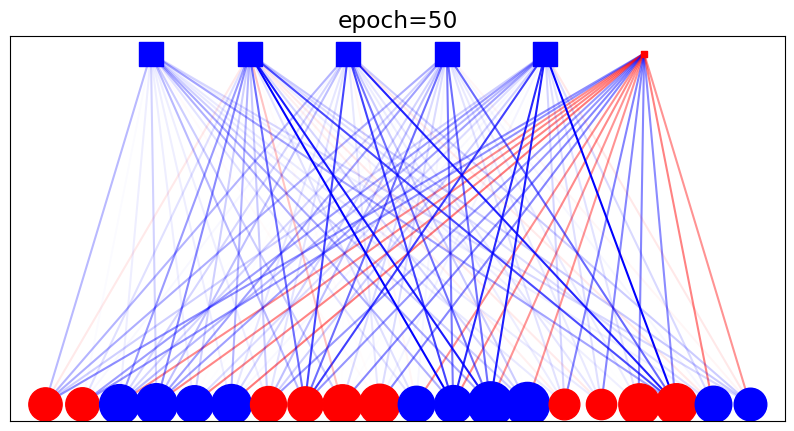

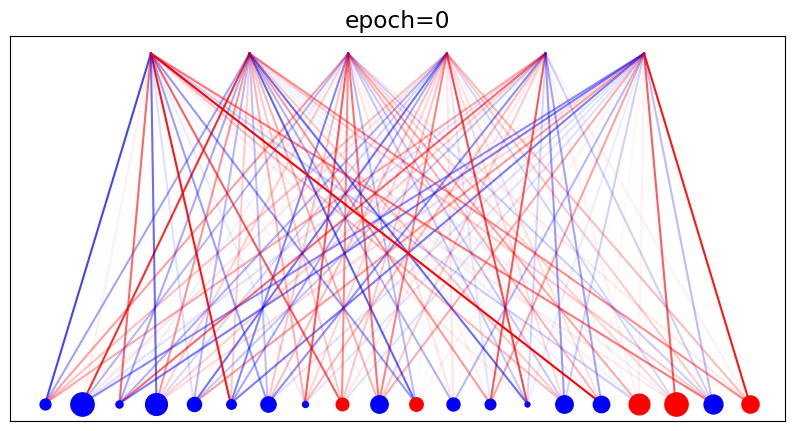

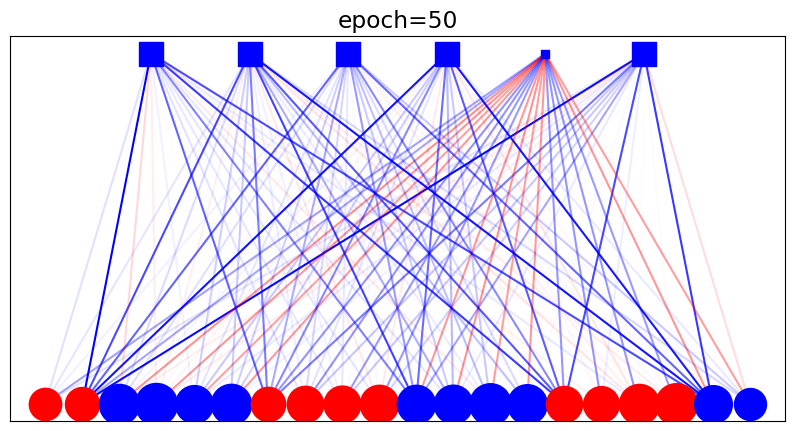

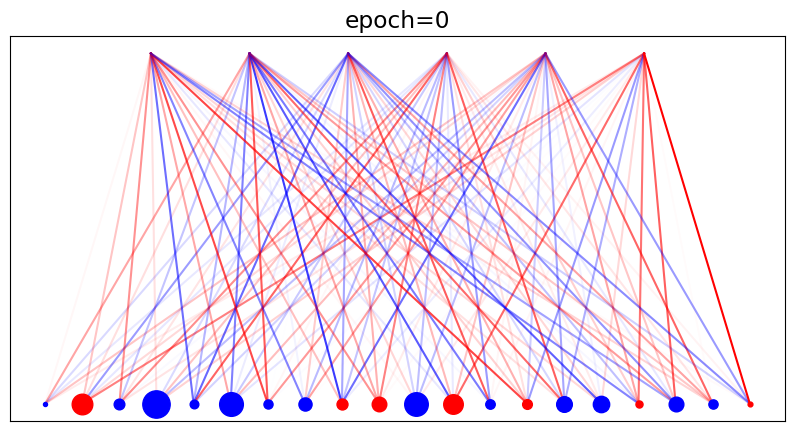

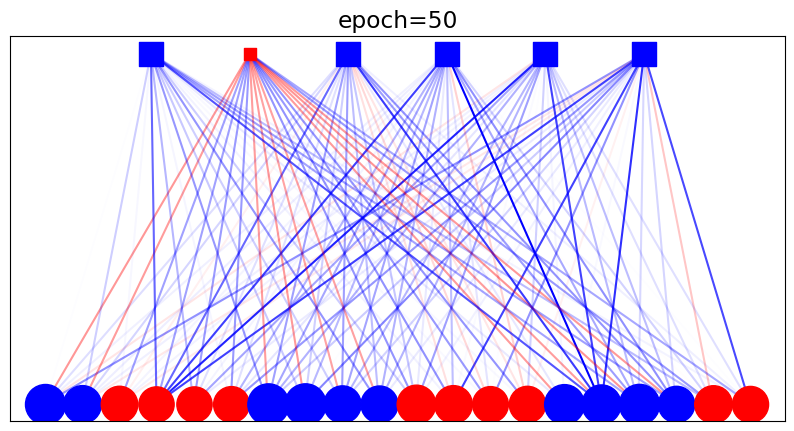

In [95]:
epochs =50
steps = [1, 2, 5, 10]

n = len(steps)

w = np.zeros((n, L, M))
a = np.zeros((n, L))
b = np.zeros((n, M))
l_val = np.zeros(n)
l_train = np.zeros((n, epochs))


for i in range(n):
    
    w[i], a[i], b[i], l_val[i], l_train[i] = SGD(v, epochs=epochs, SPINS=False, CDn=steps[i], lr=10)

In [96]:
#combine the plots of the likelihood
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,10))
x = np.arange(epochs)+1


color = ['b','r','g','orange']
fmt_list = ['o','s','^','p']

for i in range(n):

    x_mi, l_train_mi, err_mi = mean(x, l_train[i])
    ax.plot(x, l_train[i], color = color[i])
    ax.errorbar(x_mi , l_train_mi, yerr=err_mi, fmt=fmt_list[i], color=color[i], markersize=12, markeredgecolor='black', label= f'{steps[i]} steps')

better(ax)

print("Likelihoods: \n")

for i in range(n):
    
    print(steps[i], l_val[i], "\n")

Likelihoods: 

1 -5.298988838233408 

2 -5.181675128817341 

5 -5.210571138602184 

10 -5.1910369268174765 

